<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/19_Course_3_Week_3_Lesson_1_a%26b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAZ663Z/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAZ663Z/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAZ663Z/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
print(len(train_dataset))
print(len(test_dataset))

25000
25000


In [5]:
Buffer_size = 10000
Batch_size = 64

train_dataset = train_dataset.shuffle(Buffer_size)
train_dataset = train_dataset.padded_batch(Batch_size, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(Batch_size, tf.compat.v1.data.get_output_shapes(test_dataset))

In [11]:
print(len(train_dataset))
print(len(test_dataset))

391
391


# Multiple Layer LSTM

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 10
history = model.fit(
    train_dataset,
    epochs = num_epochs,
    validation_data = test_dataset
)

Epoch 1/10
391/391 [==============================] - 134s 314ms/step - loss: 0.6324 - acc: 0.6172 - val_loss: 0.4543 - val_acc: 0.8033
Epoch 2/10
391/391 [==============================] - 123s 314ms/step - loss: 0.3860 - acc: 0.8358 - val_loss: 0.5686 - val_acc: 0.7265
Epoch 3/10
391/391 [==============================] - 127s 324ms/step - loss: 0.4845 - acc: 0.7676 - val_loss: 0.6277 - val_acc: 0.6370
Epoch 4/10
391/391 [==============================] - 127s 323ms/step - loss: 0.5120 - acc: 0.7567 - val_loss: 0.4926 - val_acc: 0.7924
Epoch 5/10
391/391 [==============================] - 127s 324ms/step - loss: 0.3931 - acc: 0.8320 - val_loss: 0.4127 - val_acc: 0.8126
Epoch 6/10
391/391 [==============================] - 127s 323ms/step - loss: 0.2533 - acc: 0.9020 - val_loss: 0.3781 - val_acc: 0.8351
Epoch 7/10
391/391 [==============================] - 127s 324ms/step - loss: 0.1933 - acc: 0.9287 - val_loss: 0.4280 - val_acc: 0.8343
Epoch 8/10
391/391 [============================

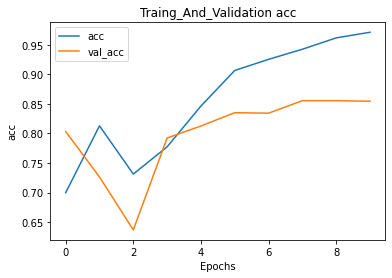

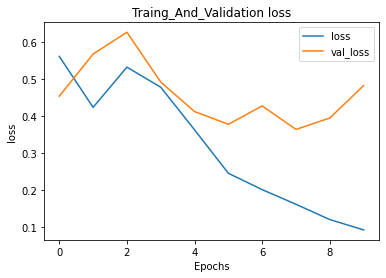

In [9]:
import matplotlib.pyplot as  plt
%matplotlib inline

def plot_graphs(history, string) :
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.title('Traing_And_Validation {}'.format(string))
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

# Single Layer LSTM

In [29]:
model_sub = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_sub.summary()

model_sub.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [30]:
history_sub = model_sub.fit(
    train_dataset,
    epochs = num_epochs,
    validation_data = test_dataset
)

Epoch 1/10
391/391 [==============================] - 75s 182ms/step - loss: 0.6407 - acc: 0.6113 - val_loss: 0.5185 - val_acc: 0.8094
Epoch 2/10
391/391 [==============================] - 72s 183ms/step - loss: 0.3821 - acc: 0.8437 - val_loss: 0.3996 - val_acc: 0.8321
Epoch 3/10
391/391 [==============================] - 72s 184ms/step - loss: 0.2948 - acc: 0.8863 - val_loss: 0.4500 - val_acc: 0.7895
Epoch 4/10
391/391 [==============================] - 72s 183ms/step - loss: 0.2420 - acc: 0.9102 - val_loss: 0.3995 - val_acc: 0.8483
Epoch 5/10
391/391 [==============================] - 72s 183ms/step - loss: 0.1903 - acc: 0.9319 - val_loss: 0.4320 - val_acc: 0.8220
Epoch 6/10
391/391 [==============================] - 72s 183ms/step - loss: 0.1551 - acc: 0.9447 - val_loss: 0.4587 - val_acc: 0.8271
Epoch 7/10
391/391 [==============================] - 73s 184ms/step - loss: 0.1428 - acc: 0.9481 - val_loss: 0.5276 - val_acc: 0.8277
Epoch 8/10
391/391 [==============================] - 7

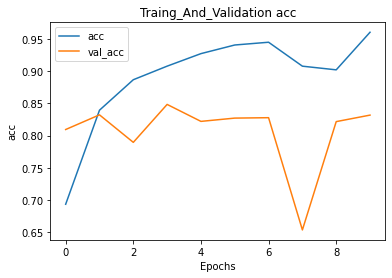

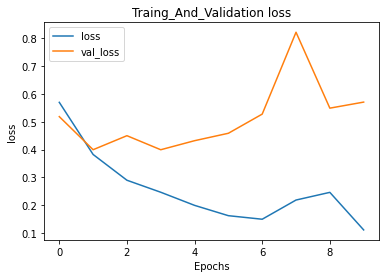

In [31]:
plot_graphs(history_sub, 'acc')
plot_graphs(history_sub, 'loss')

### 위의 Multiple Layer와 아래의 Single Layer를 비교했을 때 현 그래프에서는 심한 차이가 안보이지만 epochs를 50으로 늘렸을 경우 Multiple Layer를 사용했을 떄가 Single일 때보다 'acc', 'loss' 모두 더 매끄로운 곡석의 형태로 나타난다는 것을 알 수 있다.